In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\anujp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


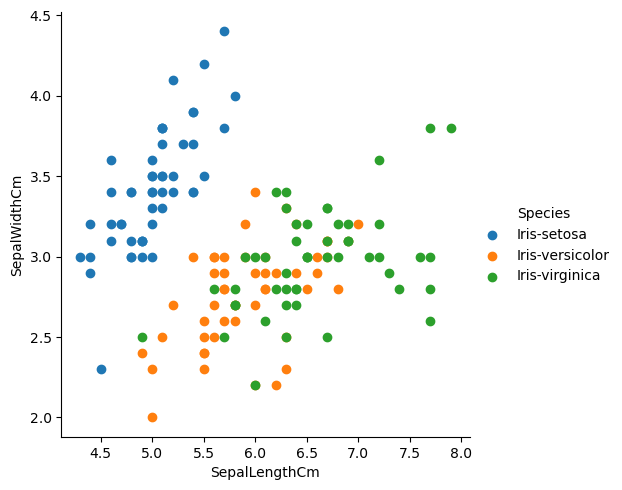

In [6]:
sns.FacetGrid(df, height=5,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

C:\Users\anujp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


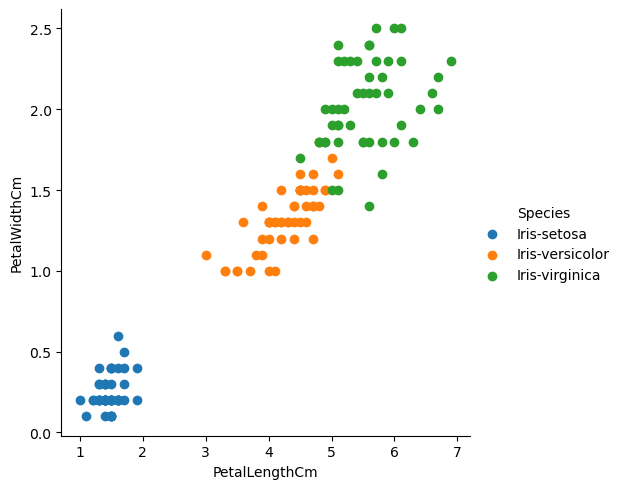

In [7]:
sns.FacetGrid(df, height=5,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

In [8]:
mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
df['Species_Number'] = df['Species'].map(mapping)

In [9]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species_Number'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

In [11]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [12]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [13]:
class KNeighborsClassifier:
    def __init__(self, **kwargs):
        self.k = kwargs.get('k', 5)
        self.dist_metric = kwargs.get('dist_metric', euclidean)
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = 100*sum(y_pred == y_test) / len(y_test)
        return accuracy

In [14]:
accuracies = []
ks = range(1, 30)

for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

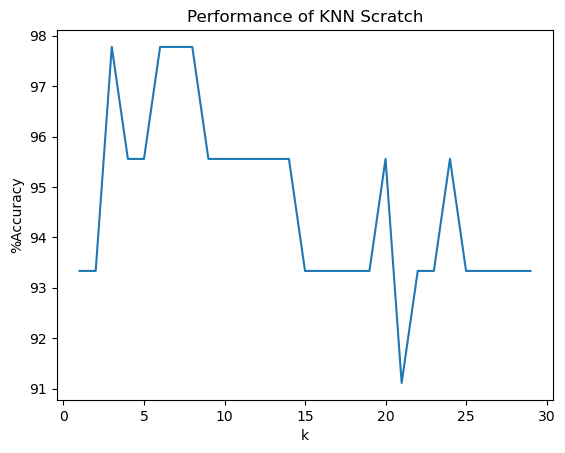

In [21]:
fig, ax = plt.subplots()

ax.plot(ks, accuracies)

ax.set(xlabel="k",
       ylabel="%Accuracy",
       title="Performance of KNN Scratch")

plt.show()

## Part B: Using Sklearn

In [22]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

prediction_=model.predict(X_test)

print('The accuracy of the KNN is',accuracy_score(prediction_,y_test)*100, '%')

The accuracy of the KNN is 95.55555555555556 %


In [23]:
accuracy_k = []
k_values = list(range(1, 30))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    
    model.fit(X_train, y_train)
    
    y_pred_ = model.predict(X_test)
    acc_k = accuracy_score(y_pred_, y_test) * 100
    
    accuracy_k.append(acc_k)

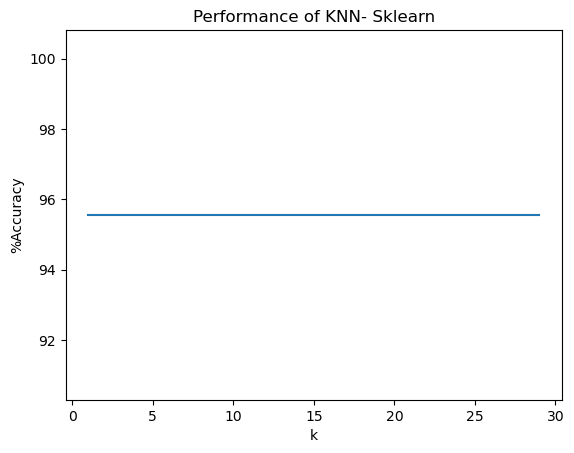

In [20]:
fig, ax = plt.subplots()

ax.plot(k_values, accuracy_k)

ax.set(xlabel="k",
       ylabel="%Accuracy",
       title="Performance of KNN- Sklearn")

plt.show()